# DeepHullNet：Visualization

## 1. Generate Random Points

In [1]:
import numpy as np

nodes = 20

def generate_random_points(n, sort_method: str = 'lex'):
    """
    Randomly sample n sorted uniformly distributed 2D points from [0.0, 1.0).

    Args:
    n: Number of x,y points to generate.
    sort_method: Method to sort points. The following methods are supported:
      lex: Sort in ascending lexicographic order starting from y.
      mag: Sort from least to greatest magnitude (or distance from origin).
    Outputs:
    Shape (n, 2) sorted numpy array of x,y coordinates.
    """

    points = np.random.random(size=[n, 2])
    if sort_method == 'lex':
        points = points[np.lexsort(([points[..., ax] for ax in range(points.shape[-1])]))]
    elif sort_method == 'mag':
        points = points[np.argsort(np.mean(points, axis=-1))]
    else:
        raise ValueError(f'{sort_method} is not a valid option for sort_method.')
    return points

points = generate_random_points(nodes)

## 2. Display Points

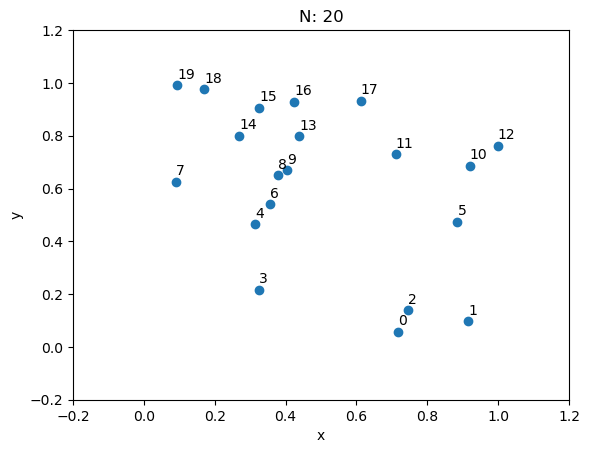

In [2]:
import matplotlib.pyplot as plt

def display_points(points):
    """
    Display a set of 2D points on a scatterplot.

    Args:

    Returns:
        object:
    points: x,y coordinate points.
    """

    y_offset = 0.025
    plt.scatter(points[:, 0], points[:, 1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.title(f'N: {len(points)}')
    plt.grid(False)

    for i, point in enumerate(points):
         plt.text(point[0], point[1] + y_offset, str(i))


display_points(points)

## 3. Convex & Concave Hull Analysis

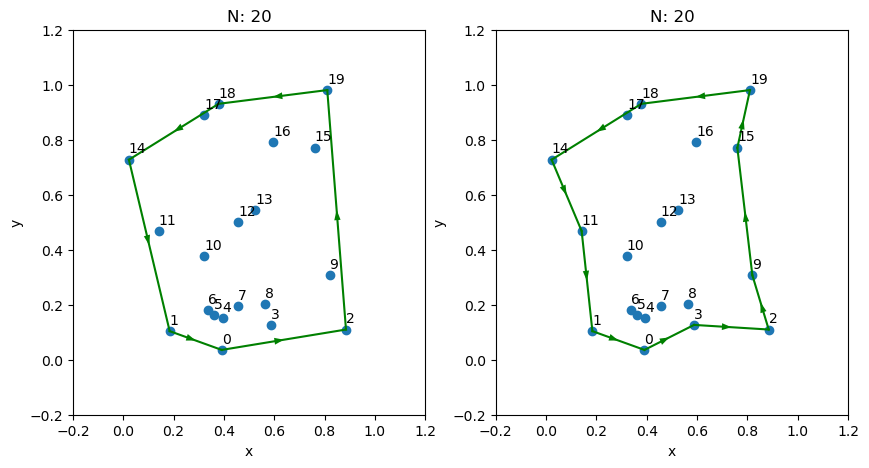

In [3]:
from scipy.spatial import ConvexHull
from concavehull import concaveHull

def display_points_with_hull(points, hull, subplot=121):
    """
    Display a set of 2D points with its convex hull.

    Args:
    points: x,y coordinate points.
    hull: List of indices indicating the convex hull of points.
    """
    plt.subplot(subplot)

    display_points(points)

    for i in range(len(hull) - 1):
        p0 = hull[i]
        p1 = hull[i + 1]
        x = points[[p0, p1], 0]
        y = points[[p0, p1], 1]
        plt.plot(x, y, 'g')
        plt.arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
                  shape='full', lw=0, length_includes_head=True, head_width=.025,
                  color='green')
    x = points[[p1, hull[0]], 0]
    y = points[[p1, hull[0]], 1]
    plt.arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
            shape='full', lw=0, length_includes_head=True, head_width=.025,
            color='green')
    plt.plot(x, y, 'g')

    plt.grid(False)

np.random.seed(2023)
points = generate_random_points(nodes)

extent=[0, 1, 0, 1]
plt.figure(figsize=(10, 5))

convex_hull_sequence = ConvexHull(points).vertices.tolist()
display_points_with_hull(points, convex_hull_sequence, 121)

def gen_targets(points, concave_hull):
  list_points = points.tolist()
  targets = []
  for i in range(len(concave_hull)):
    point = concave_hull[i].tolist()
    target = list_points.index(point)
    targets.append(target)
  return targets

k = 3
concave_hull = concaveHull(points, k)
concave_hull_sequence = gen_targets(points, concave_hull)
display_points_with_hull(points, concave_hull_sequence, 122)

plt.show()

## 4. Add RS Background Image

In all comparison graphs, <font color=Yellow, size=3> yellow lines</font> represents the solution results of the convex hull algorithm, and <font color=yellow, size=3>red lines</font> represents the solution results of DeepHullNet.

In [ ]:
img = plt.imread("./img/rs_img.jpg")
extent = [0, 1, 0, 1]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# ====================convex hull====================
ax[0].imshow(img, extent=extent)

hull = ConvexHull(points).vertices.tolist()

y_offset = 0.025
ax[0].scatter(points[:, 0], points[:, 1], marker='+', s=50, c='b', lw=3)
ax[0].grid(False)

for i in range(len(hull) - 1):
    p0 = hull[i]
    p1 = hull[i + 1]
    x = points[[p0, p1], 0]
    y = points[[p0, p1], 1]
    ax[0].plot(x, y, c='yellow')
    ax[0].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
              shape='full', lw=0, length_includes_head=True, head_width=.025,
              color='yellow')
x = points[[p1, hull[0]], 0]
y = points[[p1, hull[0]], 1]
ax[0].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
        shape='full', lw=0, length_includes_head=True, head_width=.025,
        color='yellow')
ax[0].plot(x, y, 'yellow', lw=1)

ax[0].set_axis_off()


# ====================concave hull====================
ax[1].imshow(img, extent=extent)

y_offset = 0.025
ax[1].scatter(points[:, 0], points[:, 1], marker='+', s=50, c='b', lw=3)
ax[1].grid(False)


k = 3
concave_hull = concaveHull(points, k)
hull = gen_targets(points, concave_hull)


for i in range(len(hull) - 1):
    p0 = hull[i]
    p1 = hull[i + 1]
    x = points[[p0, p1], 0]
    y = points[[p0, p1], 1]
    ax[1].plot(x, y, c='red')
    ax[1].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
              shape='full', lw=0, length_includes_head=True, head_width=.025,
              color='red')
x = points[[p1, hull[0]], 0]
y = points[[p1, hull[0]], 1]
ax[1].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
        shape='full', lw=0, length_includes_head=True, head_width=.025,
        color='red')
ax[1].plot(x, y, 'red', lw=1)

ax[1].set_axis_off()


plt.show()

## 5. pred vs truth

### 5.1 import python package and set parameters

In [ ]:
from solver import generate_convex_hull, save_data, cyclic_permute, generate_concave_hull, gen_targets
from process import Scatter2DDataset
from torch.utils.data import DataLoader
from models.Transform.model import DeepHullNet
import torch
import os
import alphashape

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

TOKENS = {
    '<sos>': 0,
    '<eos>': 1
}

problem = 'convex'
idx = 0
min_nodes = 50
max_nodes = 50
n = 20
use_cuda = True
plot = True

cfg = {'min_nodes': min_nodes, 'max_nodes': max_nodes}

extent = [-0.2, 1.2, -0.2, 1.2]

### 5.2 Convex hull

In [ ]:
# ========== convex hull ==========
eval_dataset = Scatter2DDataset(file_name=f'./dataset/eval/convex/{min_nodes}-{max_nodes}/eval_dataset.json')
eval_loader = DataLoader(
    eval_dataset, batch_size=1, shuffle=True,
    num_workers=0, pin_memory=False)
# device = torch.device("cuda" if torch.cuda.is_available() and use_cuda else "cpu")
device = torch.device('cpu')
model = DeepHullNet(c_inputs=5, c_embed=16, n_heads=4,
                    n_layers=3, dropout=0.0, c_hidden=16).to(device)

checkpoint_file = f'./checkpoint/convex/50-50/Transform/best_params.pkl'
model.load_state_dict(torch.load(checkpoint_file)['model_state'])

batch_data, batch_labels, batch_lengths = next(iter(eval_loader))
log_pointer_scores, pointer_argmaxs = model(batch_data.to(device),
                                            batch_lengths.to(device), batch_labels=batch_labels)

pred_hull_idxs = pointer_argmaxs[idx].cpu()
pred_hull_idxs = pred_hull_idxs[pred_hull_idxs > 1] - 2
points = batch_data[idx, 2:batch_lengths[idx], :2]
true_hull_idxs = ConvexHull(points).vertices.tolist()
true_hull_idxs = cyclic_permute(true_hull_idxs, np.argmin(true_hull_idxs))

print(f'Predicted: {pred_hull_idxs.tolist()}')
print(f'True:      {true_hull_idxs}')


# ====================================================================

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# ================ real ================
ax[0].imshow(img, extent=extent)


y_offset = 0.025
ax[0].scatter(points[:, 0], points[:, 1], marker='+', s=50, c='b', lw=3)
ax[0].grid(False)

for i in range(len(true_hull_idxs) - 1):
    p0 = true_hull_idxs[i]
    p1 = true_hull_idxs[i + 1]
    x = points[[p0, p1], 0]
    y = points[[p0, p1], 1]
    ax[0].plot(x, y, c='yellow')
    ax[0].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
              shape='full', lw=0, length_includes_head=True, head_width=.025,
              color='yellow')
x = points[[p1, true_hull_idxs[0]], 0]
y = points[[p1, true_hull_idxs[0]], 1]
ax[0].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
        shape='full', lw=0, length_includes_head=True, head_width=.025,
        color='yellow')
ax[0].plot(x, y, 'yellow', lw=1)

ax[0].set_axis_off()


# ================ predict ================
ax[1].imshow(img, extent=extent)

y_offset = 0.025
ax[1].scatter(points[:, 0], points[:, 1], marker='+', s=50, c='b', lw=3)
ax[1].grid(False)

for i in range(len(pred_hull_idxs) - 1):
    p0 = pred_hull_idxs[i]
    p1 = pred_hull_idxs[i + 1]
    x = points[[p0, p1], 0]
    y = points[[p0, p1], 1]
    ax[1].plot(x, y, c='red')
    ax[1].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
              shape='full', lw=0, length_includes_head=True, head_width=.025,
              color='red')
x = points[[p1, pred_hull_idxs[0]], 0]
y = points[[p1, pred_hull_idxs[0]], 1]
ax[1].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
        shape='full', lw=0, length_includes_head=True, head_width=.025,
        color='red')
ax[1].plot(x, y, 'red', lw=1)

ax[1].set_axis_off()


plt.show()

### 5.3 Concave hull

In [ ]:
eval_dataset = Scatter2DDataset(file_name=f'./dataset/eval/concave/{min_nodes}-{max_nodes}/eval_dataset.json')
eval_loader = DataLoader(
    eval_dataset, batch_size=1, shuffle=True,
    num_workers=0, pin_memory=False)

# device = torch.device("cuda" if torch.cuda.is_available() and use_cuda else "cpu")
device = torch.device('cpu')
model = DeepHullNet(c_inputs=5, c_embed=16, n_heads=4,
                    n_layers=3, dropout=0.0, c_hidden=16).to(device)

checkpoint_file = f'./checkpoint/concave/50-50/Transform/best_params.pkl'
model.load_state_dict(torch.load(checkpoint_file)['model_state'])

batch_data, batch_labels, batch_lengths = next(iter(eval_loader))
log_pointer_scores, pointer_argmaxs = model(batch_data.to(device),
                                            batch_lengths.to(device), batch_labels=batch_labels)

pred_hull_idxs = pointer_argmaxs[idx].cpu()
pred_hull_idxs = pred_hull_idxs[pred_hull_idxs > 1] - 2

points = np.array(batch_data[idx, 2:batch_lengths[idx], :2])

k = 3
concave_hull = concaveHull(points, k)
true_hull_idxs = gen_targets(points, concave_hull)
true_hull_idxs = cyclic_permute(true_hull_idxs, np.argmin(true_hull_idxs))

alpha = 4.0
alpha_shape = alphashape.alphashape(points, alpha)

print(f'Predicted: {pred_hull_idxs.tolist()}')
print(f'True:      {true_hull_idxs}')

# ==============================================================

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# ================ real ================
ax[0].imshow(img, extent=extent)


y_offset = 0.025
ax[0].scatter(points[:, 0], points[:, 1], marker='+', s=50, c='b', lw=3)
ax[0].grid(False)

for i in range(len(true_hull_idxs) - 1):
    p0 = true_hull_idxs[i]
    p1 = true_hull_idxs[i + 1]
    x = points[[p0, p1], 0]
    y = points[[p0, p1], 1]
    ax[0].plot(x, y, c='yellow')
    ax[0].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
              shape='full', lw=0, length_includes_head=True, head_width=.025,
              color='yellow')
x = points[[p1, true_hull_idxs[0]], 0]
y = points[[p1, true_hull_idxs[0]], 1]
ax[0].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
        shape='full', lw=0, length_includes_head=True, head_width=.025,
        color='yellow')
ax[0].plot(x, y, 'yellow', lw=1)

ax[0].set_axis_off()


# ================ predict ================
ax[1].imshow(img, extent=extent)

y_offset = 0.025
ax[1].scatter(points[:, 0], points[:, 1], marker='+', s=50, c='b', lw=3)
ax[1].grid(False)

for i in range(len(pred_hull_idxs) - 1):
    p0 = pred_hull_idxs[i]
    p1 = pred_hull_idxs[i + 1]
    x = points[[p0, p1], 0]
    y = points[[p0, p1], 1]
    ax[1].plot(x, y, c='red')
    ax[1].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
              shape='full', lw=0, length_includes_head=True, head_width=.025,
              color='red')
x = points[[p1, pred_hull_idxs[0]], 0]
y = points[[p1, pred_hull_idxs[0]], 1]
ax[1].arrow(x[0], y[0], (x[1] - x[0]) / 2., (y[1] - y[0]) / 2.,
        shape='full', lw=0, length_includes_head=True, head_width=.025,
        color='red')
ax[1].plot(x, y, 'red', lw=1)

ax[1].set_axis_off()


plt.show()